# ENTORNOS DATA SCIENCE (PYTHON)
# Prueba de evaluación continua 3
***
- Autor: Juan A. García Cuevas
- Fecha: 03/11/2016
***

# Enunciado

Esta prueba abierta de temática libre trata de que hagáis un análisis de un dataset que vosotros seleccionéis (del repositorio de statsmodels, del de R o de cualquier otro que encontréis en Internet). Se valorará la presentación de las ideas de análisis, el uso de la herramienta de los Notebooks, gráficos que sean relevantes y de las bibliotecas del stack científico de Python.

Solo se pide llegar al análisis estadístico básico, no a hacer modelos productivos con aprendizaje automático. No se pretende hacer un estudio estadístico inferencial avanzado sino un estudio exploratorio que muestre hallazgos interesantes en el dataset. Es muy valorable el cómo comuniquéis los hallazgos, por lo que no es cuestión de incluir todos los análisis, sino los que resulten informativos e interesantes, en formatos gráficos o numéricos fáciles de leer y entender.

# Descripción del ejercicio

Para la realización de este ejercicio se ha seleccionado un conjunto de datos de temperaturas medias máxima y mínima por mes y año en la ciudad de Zaragoza entre los años 1892 y 2013, cuyo origen es el Ayuntamiento de Zaragoza:

- http://datos.gob.es/catalogo/clima-del-termino-municipal-de-zaragoza

### Estadística descriptiva

La estadística descriptiva se encarga de recolectar, ordenar, analizar y representar conjuntos de datos con el fin de describir apropiadamente las características de los mismos.

En la estadística descriptiva se realizan cálculos y representaciones gráficas de los parámetros estadísticos que describen los conjuntos de datos estudiados. Algunas de las herramientas utilizadas son medidas de frecuencias, medidas de centralización, medidas de posición, medidas de dispersión, gráficos, etc.

> En el ejercicio se mostrarán algunos calculos y representaciones gráficas para el conjunto de datos seleccionado.

### Series temporales

Las series temporales son conjunto de datos recogidos a intervalos de tiempo constantes. Estos datos se analizan para determinar la tendencia a largo plazo, con el fin de predecir el futuro o realizar alguna otra forma de análisis.

Hay que tener en cuenta que, en el análisis de series temporales no se pueden utilizar modelos de regresión lineales, ya que la hipótesis básica de estos modelos es que las observaciones son independientes, cosa que no se cumple en estos casos.

Por otro lado, la mayoría de series temporales tienen algún tipo de tendencia a la estacionalidad, es decir, las variaciones propias de un período de tiempo determinado.

Por todo ello, en el análisis de series temporales se requieren pasos adicionales respecto al análisis de otros tipos de conjuntos de datos.

> El conjuto de datos del ejercicio ha sido seleccionado para poder aplicar el análisis de series temporales.

### Bibliotecas del stack científico de Python

Algunas de las librerías de python más conocidas y usadas en la Ciencia de Datos son:

- **NumPy**: extensión de Python que agrega mayor soporte para vectores y matrices, constituyendo una biblioteca de funciones matemáticas de alto nivel para operar con ellos.

- **SciPy**: contiene módulos de optimización, álgebra lineal, integración, interpolación, funciones especiales, FFT, procesamiento de señales y de imagen, resolución de ODEs y otras tareas para la ciencia e ingeniería.

- **Pandas:** librería para manipulación y análisis de datos que ofrece, en particular, estructuras de datos y operaciones para manipular trablas y series temporles.

- **Matplotlib**: biblioteca para generar gráficos a partir de datos contenidos en listas o arrays en Python y su extensión matemática NumPy.

- **Seaborn**: librería de visualización de datos basada en matplotlib. Proporciona a los científicos de datos una interfaz para hacer gráficos estadísticos atractivos e explicativos: el objetivo es visualizar datos complejos de forma sencilla y extraer conclusiones.



***
# Carga de un fichero de datos CSV
Comenzaremos por cargar librerías y preparar el entorno para el notebook.

In [1]:
# Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats

# Activamos los graficos embebidos y configuramos el tamaño
%matplotlib inline 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

Cargamos los datos en un dataframe desde un fichero CSV previamente descargado.

In [2]:
data = pd.read_csv('./data.csv', delimiter=';', skiprows=1)
print '\n*** Primeras filas de dataset:'
print data.head(5)
print '\n*** Tipos de datos:'
print data.dtypes


*** Primeras filas de dataset:
   anio  mes  tmax  tmin
0  1892    1   9.6   3.8
1  1892    2   6.7   3.0
2  1892    3  14.6   7.1
3  1892    4  19.6   8.7
4  1892    5  24.5  10.6

*** Tipos de datos:
anio      int64
mes       int64
tmax    float64
tmin    float64
dtype: object


Como podemos ver, cada fila de datos contiene las temperaturas medias máxima y mínima para un año y un mes concretos. Ahoa aplicaremos algunos cálculos estadísticos básicos.

***
# Parámetros estadísticos

Los parámetros estadísticos son números que se obtienen a partir de los datos de una distribución estadística y sirven para sintetizar la información.

Los parámetros estadísticos pueden ser:

- De **centralización**

- De **posición**

- De **dispersión**

Algunos de estos estadísticos pueden obtenerse con la función describe de la librería pandas:

In [3]:
print '\n*** Algunas estadísticas:'
print data.describe()


*** Algunas estadísticas:
              anio          mes         tmax        tmin
count  1464.000000  1464.000000  1464.000000  1464.00000
mean   1952.500000     6.500000    20.741325     9.84515
std      35.229217     3.453232     7.748490     5.63367
min    1892.000000     1.000000     6.300000    -3.80000
25%    1922.000000     3.750000    13.875000     4.90000
50%    1952.500000     6.500000    20.400000     9.20000
75%    1983.000000     9.250000    27.900000    14.70000
max    2013.000000    12.000000    35.600000    21.80000


### Medidas de centralización
Las medidas de centralización indican en torno a qué valor (centro) se distribuyen los datos:

Las medidas de centralización son:
- **Media aritmética**: valor obtenido al sumar todos los datos y dividir el resultado entre el número total de datos.
- **Mediana**: puntación de la escala que separa la mitad superior de la distribución y la inferior (divide la serie de datos en dos partes iguales).
- **Moda**: valor que más se repite en una distribución.

In [4]:
# Medias aritméticas
meanTMax = round(data['tmax'].mean(), 2)
print '\n- Media aritmética del conjunto de temperaturas máximas..:', meanTMax
meanTMin = round(data['tmin'].mean(), 2)
print '- Media aritmética del conjunto de temperaturas mínimas..:', meanTMin

# Medianas
medianTmax = np.median(data['tmax']) 
print '\n- Mediana del conjunto de temperaturas máximas...........:', medianTmax
medianTmin = np.median(data['tmin']) 
print '- Mediana del conjunto de temperaturas mínimas...........:', medianTmin

# Moda y frecuencia
modeTMax = stats.mode(data['tmax']) 
print '\n- Moda del conjunto de temperaturas máximas..............:', modeTMax[0][0]
print '- Frecuencia del conjunto de temperaturas máximas........:', modeTMax[1][0]
modeTMin = stats.mode(data['tmin']) 
print '\n- Moda del conjunto de temperaturas mínimas..............:', modeTMin[0][0]
print '- Frecuencia del conjunto de temperaturas mínimas........:', modeTMin[1][0]



- Media aritmética del conjunto de temperaturas máximas..: 20.74
- Media aritmética del conjunto de temperaturas mínimas..: 9.85

- Mediana del conjunto de temperaturas máximas...........: 20.4
- Mediana del conjunto de temperaturas mínimas...........: 9.2

- Moda del conjunto de temperaturas máximas..............: 11.5
- Frecuencia del conjunto de temperaturas máximas........: 13

- Moda del conjunto de temperaturas mínimas..............: 4.3
- Frecuencia del conjunto de temperaturas mínimas........: 18


### Medidas de posición

Las medidas de posición dividen un conjunto de datos en grupos con el mismo número de individuos.

Para calcular las medidas de posición es necesario que los datos estén ordenados de menor a mayor.

La medidas de posición son:
- **Cuartiles**: dividen la serie de datos en cuatro partes iguales.
- **Deciles**: dividen la serie de datos en diez partes iguales.
- **Percentiles**: dividen la serie de datos en cien partes iguales.

Por ejemplo, el cuantil de orden 0.36 dejaría un 36% de valores por debajo y el cuantil de orden 0.50 se corresponde con la mediana de la distribución.

In [5]:
# Percentiles

perc75TMaxnp = np.percentile(data['tmax'], 75)
print '\n- Percentil 75 de temperaturas máximas con numpy:', perc75TMaxnp
perc75TMaxsc = stats.scoreatpercentile(data['tmax'], 75)
print '- Percentil 75 de temperaturas máximas con stats:', perc75TMaxsc

perc75TMinnp = np.percentile(data['tmin'], 75)
print '\n- Percentil 75 de temperaturas mínimas con numpy:', perc75TMinnp
perc75TMinsc = stats.scoreatpercentile(data['tmin'], 75)
print '- Percentil 75 de temperaturas mínimas con stats:', perc75TMinsc

# Deciles

deciles = np.arange(1, 10) * 10

decTMax = [np.percentile(data['tmax'], dec) for dec in deciles]
print '\n- Deciles de temperaturas máximas: ', decTMax

decTMin = [np.percentile(data['tmin'], dec) for dec in deciles]
print '\n- Deciles de temperaturas mínimas: ', decTMin



- Percentil 75 de temperaturas máximas con numpy: 27.9
- Percentil 75 de temperaturas máximas con stats: 27.9

- Percentil 75 de temperaturas mínimas con numpy: 14.7
- Percentil 75 de temperaturas mínimas con stats: 14.7

- Deciles de temperaturas máximas:  [10.6, 12.6, 14.889999999999997, 17.620000000000005, 20.399999999999999, 23.100000000000001, 26.509999999999991, 29.300000000000004, 31.399999999999999]

- Deciles de temperaturas mínimas:  [2.8999999999999999, 4.2999999999999998, 5.5, 7.2999999999999998, 9.1999999999999993, 11.5, 13.6, 15.699999999999999, 18.0]


### Medidas de dispersión

Las medidas de dispersión nos informan sobre cuánto se alejan del centro los valores de la distribución.

Las medidas de dispersión son:
- **Rango o recorrido**: diferencia entre el mayor y el menor de los datos de una distribución estadística.
- **Desviación media**: es la media aritmética de los valores absolutos de las desviaciones respecto a la media.
- **Varianza**: media aritmética del cuadrado de las desviaciones respecto a la media de una distribución estadística.
- **Desviación típica**: raíz cuadrada de la varianza.

In [6]:
# Varianza

varTMax = np.var(data['tmax']) 
print '\n- Varianza de temperaturas máximas:', varTMax
varTMin = np.var(data['tmin']) 
print '- Varianza de temperaturas mínimas:', varTMin


# Desviación típica

stdTMax = np.std(data['tmax']) 
print '\n- Varianza de temperaturas máximas:', stdTMax
stdTMin = np.std(data['tmin']) 
print '- Varianza de temperaturas mínimas:', stdTMin



- Varianza de temperaturas máximas: 59.9980941457
- Varianza de temperaturas mínimas: 31.7165611796

- Varianza de temperaturas máximas: 7.74584366907
- Varianza de temperaturas mínimas: 5.63174583762


***
# Carga de un fichero de datos CSV con serie temporal

Hemos cargado anteriormente los datos del fichero CSV y en ellos podíamos ver las columnas año y mes. Pero el año y el mes tal cuales no representan una serie temporal. Para poder leer los datos como series temporales hay que pasar algunos argumentos adicionales al comando read_csv:

In [7]:
data = pd.read_csv('./data.csv', delimiter=';', skiprows=1, parse_dates=[[0, 1]], index_col = 0)
print '\n*** Primeras filas de dataset:'
print data.head(5)
print '\n*** Tipos de datos:'
print data.dtypes


*** Primeras filas de dataset:
                     tmax  tmin
anio_mes                       
1892-01-01 00:00:00   9.6   3.8
1892-02-01 00:00:00   6.7   3.0
1892-03-01 00:00:00  14.6   7.1
1892-04-01 00:00:00  19.6   8.7
1892-05-01 00:00:00  24.5  10.6

*** Tipos de datos:
tmax    float64
tmin    float64
dtype: object


Ahora ya tenemos los datos organizados en una serie temporal. Podemos ver que los datos tienen como índice un objeto de tipo datetime.

In [8]:
print data.index

DatetimeIndex(['1892-01-01', '1892-02-01', '1892-03-01', '1892-04-01',
               '1892-05-01', '1892-06-01', '1892-07-01', '1892-08-01',
               '1892-09-01', '1892-10-01',
               ...
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01', '2013-09-01', '2013-10-01',
               '2013-11-01', '2013-12-01'],
              dtype='datetime64[ns]', name=u'anio_mes', length=1464, freq=None)


Para hacernos una idea gráfica de los datos, representemos las observaciones en un gráfico simple.

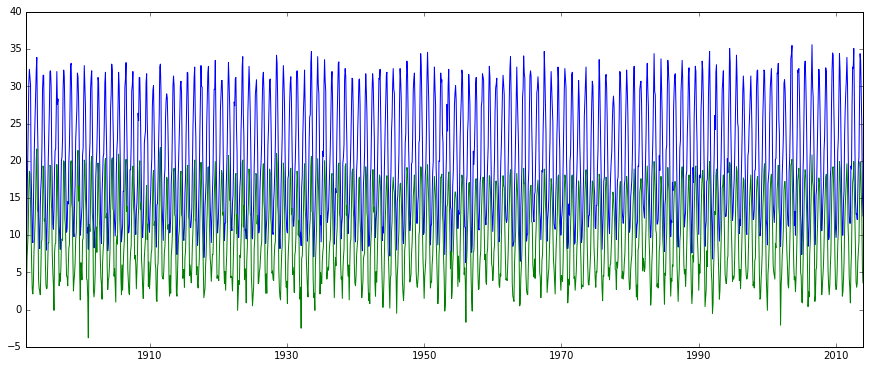

In [9]:
plt.plot (data)

# Análisis de serie temporal

Mostraremos ahora algunos gráficos algo más elaborados que el anterior. Para ello, crearemos una función.

In [10]:
################################################################################
# Muestra una gráfica de una serie temporal
# Parámetros:
# - data: dataframe
# - nomcol: nombre de columna del dataframe 
# - tipo: texto para utilizar en los mensajes
################################################################################
def plotTemp(data, nomcol, tipo):
    
    # Serie de temperaturas
    coldata = data[nomcol]

    anioini = min(data.index).year
    aniofin = max(data.index).year
    valmin = round(min(coldata), 0)
    valmax = round(max(coldata), 0)
    valamp = valmax - valmin

    stripe_sup_max = int(round(valmax + 0.1 * valamp, 0))
    stripe_sup_min = int(round(valmax - 0.1 * valamp, 0))
    stripe_inf_max = int(round(valmin + 0.1 * valamp, 0))
    stripe_inf_min = int(round(valmin - 0.1 * valamp, 0))

    # Dibujamos la gráfica
    plt.figure(num = None, figsize = (15, 8), dpi = 80, facecolor = 'w', edgecolor = 'k')
    plt.plot(coldata, linewidth = 1, color = 'g', label = (u'Temperaturas %s medias mensuales' % (tipo.decode('utf-8'))))

    # Destacamos los valores por encima del límite superior
    plt.plot(coldata[coldata > stripe_sup_min], 'ro', label = (u'Temp.máx. > %sº' % (str(stripe_sup_min)))) 
    plt.axhspan(stripe_sup_min, stripe_sup_max, alpha = 0.1, color = 'r')

    # Destacamos los valores por debajo del limite inferior
    plt.plot(coldata[coldata < stripe_inf_max], 'bo', label = (u'Temp.mín. < %sº' % (str(stripe_inf_max)))) 
    plt.axhspan(stripe_inf_min, stripe_inf_max, alpha = 0.1, color = 'b')

    # Establecemos los límites del eje Y
    plt.ylim(valmin - 0.1 * valamp, valmax + 0.3 * valamp)

    # Colocamos la leyenda, el título y las etiquetas
    plt.legend()
    plt.title(u'Temperaturas %s medias mensuales entre %s y %s' % (tipo.decode('utf-8'), str(anioini), str(aniofin)))
    plt.ylabel(u'Temperaturas (ºC)')
    plt.xlabel(u'Año')

Mostramos el gráfico de temperaturas máximas.

- Mayor temperatura media máxima de la serie: 35.6
- Menor temperatura media máxima de la serie: 6.3


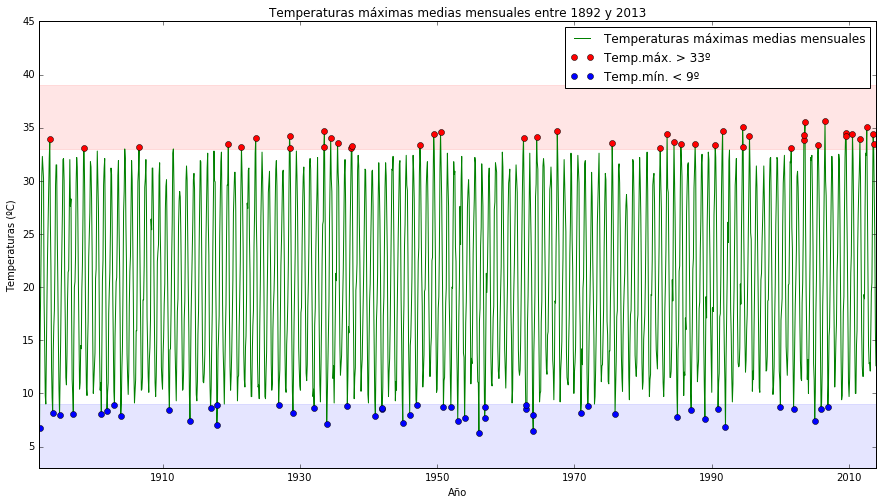

In [11]:
print '- Mayor temperatura media máxima de la serie:', data['tmax'].max()
print '- Menor temperatura media máxima de la serie:', data['tmax'].min()
plotTemp(data, 'tmax', 'máximas')

A simple vista, podemos ver que:
- Desde finales del siglo XX las temperaturas máximas alcanzan picos altos con mayor frecuencia.
- En los picos de temperaturas más bajas parece haber una ligera tendencia ascendente. Se alcanzan temperaturas mínimas medias menos bajas.

Mostramos ahora el gráfico de temperaturas mínimas.

- Mayor temperatura media mínima de la serie: 21.8
- Menor temperatura media mínima de la serie: -3.8


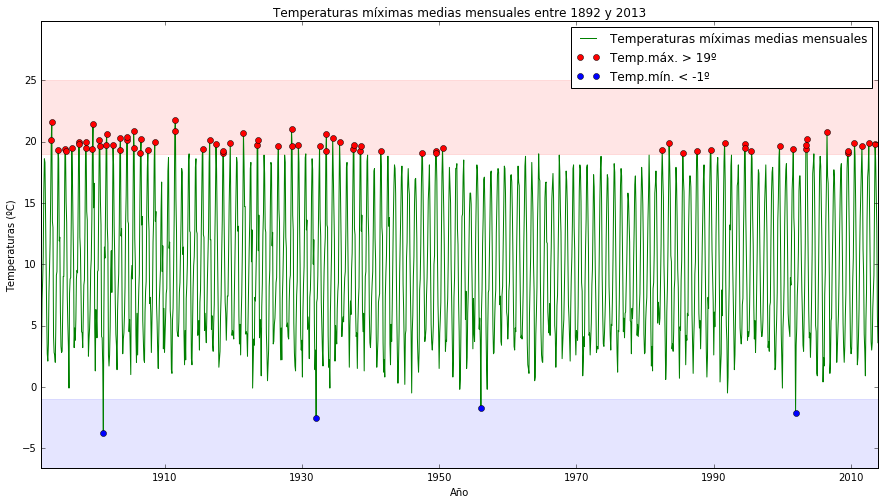

In [12]:
print '- Mayor temperatura media mínima de la serie:', data['tmin'].max()
print '- Menor temperatura media mínima de la serie:', data['tmin'].min()
plotTemp(data, 'tmin', 'míximas')

A simple vista, podemos ver que:
- En las décadas alrededor del 1900 las temperaturas mínimas medias eran más altas que en el resto de la serie.
- Entre 1940 y 2980 las temperaturas medias mínimas parecen descender.
- A finales del siglo XX estas temperaturas parece que vuelven al alza, pero sin llegar a alcanzar los niveles de finales del siglo XIX.

## Estacionariedad de la serie temporal

Intuitivamente podemos pensar que si una serie temporal tiene un comportamiento particular con el tiempo, es muy probable ese comportamiento se mantenga en el futuro. Además, las teorías relacionadas con las series estacionarias son más maduras y fáciles de implementar en comparación con las series no estacionarias.

Aunque la estacionariedad se define utilizando criterios muy estrictos, para simplificar, se considera que una serie temporal es estacionaria si sus propiedades estadísticas tales como la media o la varianza se mantienen constantes en el tiempo.

Aunque en ocasiones en los gráficos pueden verse claramente tendencias de aumento o disminución globales de los datos junto con variaciones estacionales, en otros casos no es tan evidente visualmente. Por ello, la estacionariedad puede verificarse de manera más formal mediante las técnicas como:

- Rolling Statistics: técnica para representar gráficamente la variación media móvil o en movimiento y ver si varía con el tiempo.

- Test de Dickey-Fuller: prueba en la que se parte de la hipótesis nula de que la serie temporal no es estacionaria. Si la 'Estadística de Prueba' es menor que el 'Valor Crítico', podemos rechazar la hipótesis nula y decir que la serie es estacionaria. _NOTA: téngase en cuenta que han de compararse los valores con su signo, y no sus valores absolutos_.

Ahora comprobaremos la estacionariedad de nuestras series, y para ello crearemos una función para testear la estacionariedad de una serie de temperaturas, y la aplicaremos a los datos de temperaturas máximas y de temperaturas mínimas.

In [13]:
################################################################################
# Comprueba la estacionariedad de una serie temporal
# Parámetros:
# - timeseries: serie temporal de datos
# - colordat: color para la gráfica de datos
# - colormed: color para la gráfica de medias
# - colorstd: color para la gráfica de desviaciones estándar
################################################################################
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, colordat, colormean, colorstd):
    
    # Calculamos un desplazamiento para la gráfica Rolling Std, y mejorar la visualización del gráfico
    valmax = max(timeseries)
    valmin = min(timeseries)
    amplit = valmax - valmin
    base = int(round(valmin - 0.25 * amplit))
    
    # Determinamos rolling statistics
    rolmean = timeseries.rolling(window=12,center=False).mean()
    rolstd = timeseries.rolling(window=12,center=False).std()
    
    # Dibujamos rolling statistics
    orig = plt.plot(timeseries, color=colordat,label='Original')
    mean = plt.plot(rolmean, color=colormean, label='Rolling Mean')
    std = plt.plot(rolstd + base, color=colorstd, label = 'Rolling Std (+' + str(base) + ')')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Test de Dickey-Fuller
    print 'Resultado del tes de Dickey-Fuller:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Estadistico de prueba', 'p-value', 'Nº Lags', u'Nº observaciones'])
    for key, value in dftest[4].items():
        dfoutput[u'Valor crítico (%s)'%key] = value
    print dfoutput

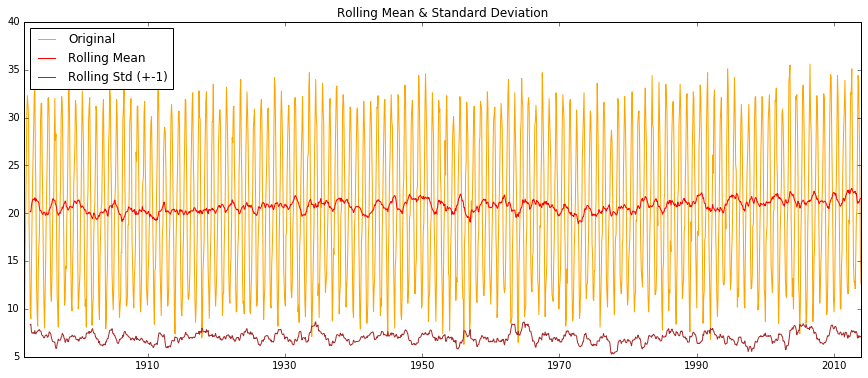

Resultado del tes de Dickey-Fuller:
Estadistico de prueba      -4.355712
p-value                     0.000355
Nº Lags                    24.000000
Nº observaciones         1439.000000
Valor crítico (5%)         -2.863551
Valor crítico (1%)         -3.434902
Valor crítico (10%)        -2.567840
dtype: float64


In [14]:
# Test de estacionalidad para la serie de temperaturas máximas
test_stationarity(data['tmax'], 'orange', 'red', 'brown')

En los resultados del Test de Dickey-Fuller podemos ver que el estadístico de prueba es inferior al valor crítico 1%, por lo que podemos rechazar la hipótesis nula y decir con confianza del 99% que se trata de una serie estacionaria.

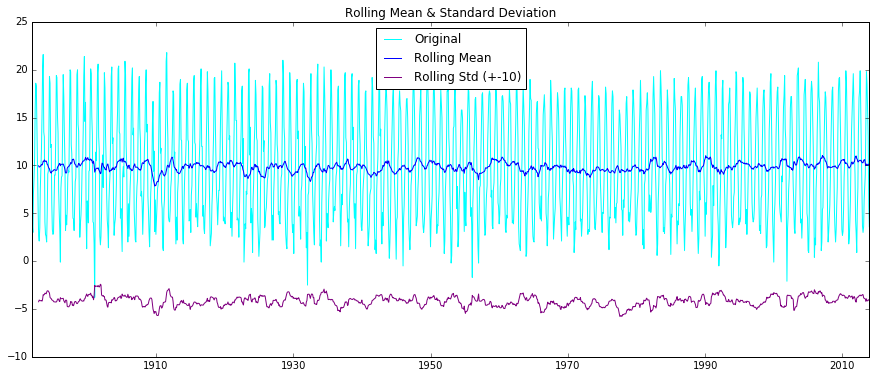

Resultado del tes de Dickey-Fuller:
Estadistico de prueba   -5.997939e+00
p-value                  1.684042e-07
Nº Lags                  2.300000e+01
Nº observaciones         1.440000e+03
Valor crítico (5%)      -2.863549e+00
Valor crítico (1%)      -3.434899e+00
Valor crítico (10%)     -2.567840e+00
dtype: float64


In [15]:
# Test de estacionalidad para la serie de temperaturas mínimas
test_stationarity(data['tmin'], 'cyan', 'blue', 'purple')

Con la serie de temperaturas mínimas pasa lo mismo que con el de temperaturas máximas, en los resultados del Test de Dickey-Fuller podemos ver que el estadístico de prueba es inferior al valor crítico 1%, por lo que podemos rechazar la hipótesis nula y decir con confianza del 99% que se trata también de una serie estacionaria.

## Convertir una serie temporal en estacionaria

En muchos modelos de series temporales se asume que la serie es estacionaria, pero en la práctica muchas no lo son, así que hay que tratar de convertirlas en estacionarias, y aunque es casi imposible hacer una serie perfectamente estacionaria, hay que intentar llegar los más cerca posible.

Detrás de una serie temporal no estacionaria hay dos razones: 
- Tendencia: variación media en el tiempo.
- Estacionalidad: variaciones en marcos de tiempo específicos.

Aunque nuestras dos series temporales son estacionarias, vamos a suponer que no lo fueran para aplicar algunas tecnicas de estacionarización a un subconjunto de observaciones de una de ellas, en concreto los 10 últimos años de temperaturas medias máximas.

### Transformación

Una de esas técnicas es aplicar una transformación que penalice valores más altos que valores más bajos, por ejemplo mediante raíz cuadrada, raíz cúbica, logaritmo... 

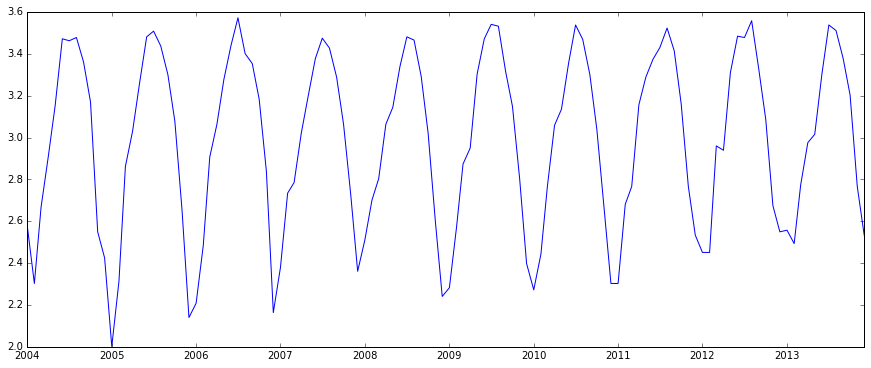

In [16]:
# Usaremos una transformación logarítmica con las temperaturas máximas en los últimos 10 años de la serie
st_muestra = data['tmax'][-120:]
ts_log = np.log(st_muestra)
plt.plot(ts_log)

En este caso es fácil ver una tendencia hacia adelante en los datos. Pero no es muy intuitivo en presencia de ruido. Así que podemos usar algunas técnicas para estimar o modelar esta tendencia y luego eliminarla de la serie. Hay muchas maneras de hacerlo y algunas de las más utilizadas son:

- Agregación: tomando la media de un período de tiempo como promedios semanales / mensuales
- Alisaminto: teniendo promedios móviles
- Polinomio Fitting: ajustar un modelo de regresión

### Alisamiento o suavización mediante la técnica de la media móvil

Ahora tarataremos de alisar la gráfica mediante la técnica de la media móvil.

En este enfoque, tomamos un promedio de 'k' valores consecutivos dependiendo de la frecuencia de las series temporales. Aquí podemos tomar el promedio del últimos año, es decir, los últimos 12 valores. Pandas tiene funciones específicas definidas para determinar las estadísticas de balanceo.

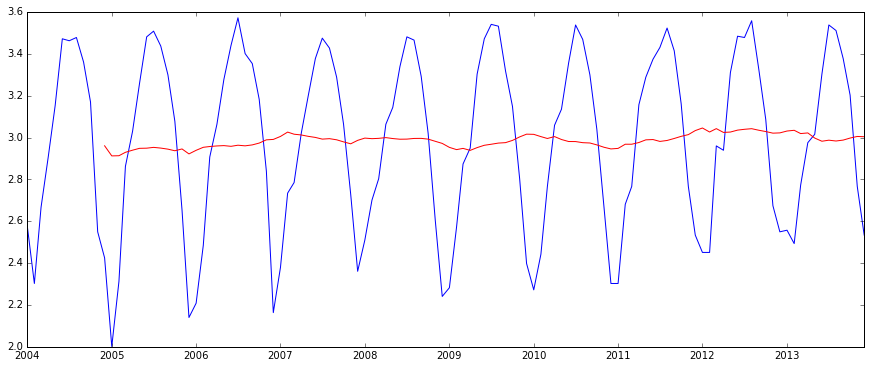

In [17]:
# Media móvil
moving_avg = ts_log.rolling(window=12,center=False).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

La línea roja muestra la media de balanceo. Vamos a restar esto de la serie original. NOTA: tener en cuenta que los primero valores no se muestran porque estamos tomando el promedio de los últimos 12 valores.

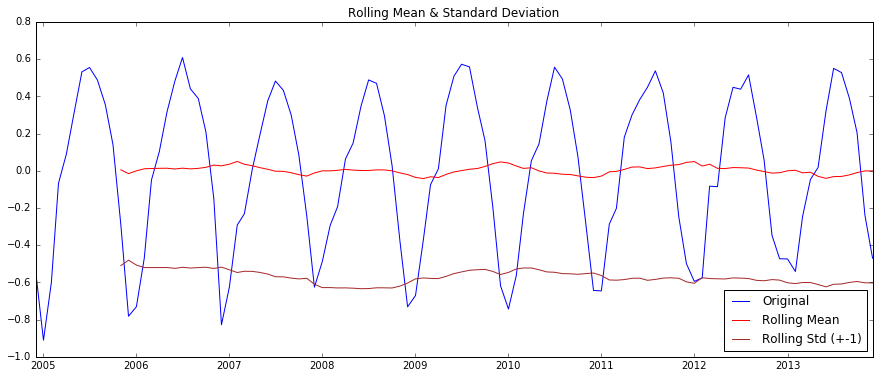

Resultado del tes de Dickey-Fuller:
Estadistico de prueba    -3.531097
p-value                   0.007223
Nº Lags                  13.000000
Nº observaciones         95.000000
Valor crítico (5%)       -2.892480
Valor crítico (1%)       -3.501137
Valor crítico (10%)      -2.583275
dtype: float64


In [18]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff, 'blue', 'red', 'brown')

Ahora la serie parece estar mucho mejor: los valores de rodadura parecen variar ligeramente, pero no hay una tendencia específica. La estadística de prueba es menor que los valores críticos al 1%, por lo que podemos decir con confianza del 99% que se trata de una serie estacionaria (como ya habíamos visto anteriormente).

### Eliminación de tendencia y estacionalidad

Las técnicas simples de reducción de tendencias anteriores no funcionan en todos los casos, particularmente los de alta estacionalidad. Vamos a ver dos maneras de eliminar la tendencia y la estacionalidad:

- Diferenciación: tomando la diferencia con un desfase de tiempo particular.
- Descomposición: En este enfoque, la tendencia y la estacionalidad se modelan por separado para retirarlas, y se devuelve el resto de la serie.

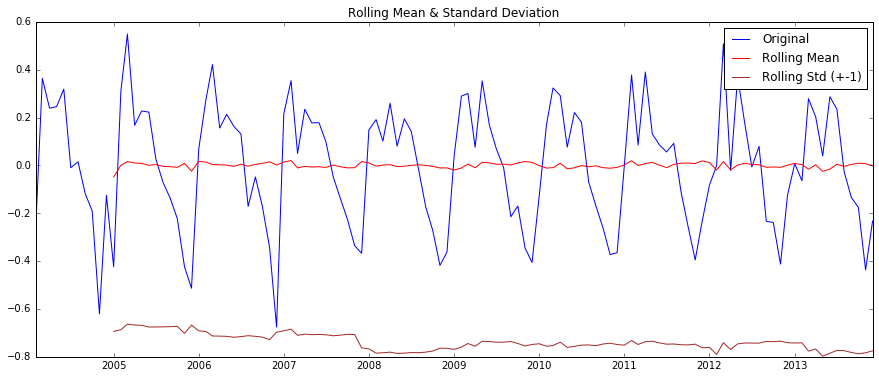

Resultado del tes de Dickey-Fuller:
Estadistico de prueba   -5.680049e+00
p-value                  8.527432e-07
Nº Lags                  1.200000e+01
Nº observaciones         1.060000e+02
Valor crítico (5%)      -2.889217e+00
Valor crítico (1%)      -3.493602e+00
Valor crítico (10%)     -2.581533e+00
dtype: float64


In [19]:
# Diferenciación
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff, 'blue', 'red', 'brown')

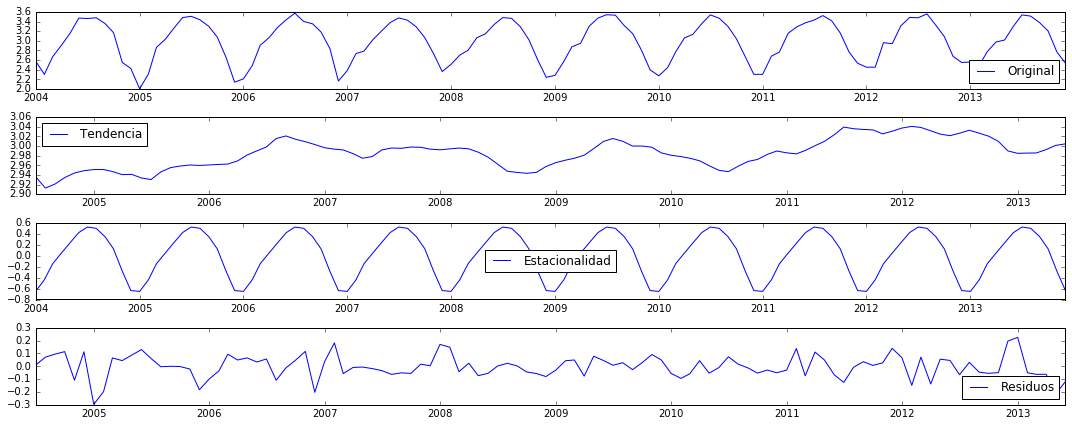

In [20]:
# Descomposición
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Tendencia')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Estacionalidad')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuos')
plt.legend(loc='best')
plt.tight_layout()

En las gráficas anteriores podemos ver cómo se separan la tendencia y la estacionalidad de los datos y podemos modelar los residuos, permitiendo verificar la estacionariedad de éstos.

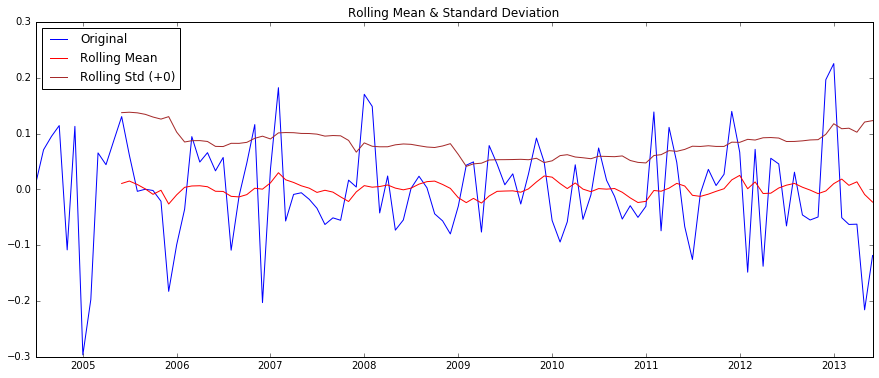

Resultado del tes de Dickey-Fuller:
Estadistico de prueba   -7.708598e+00
p-value                  1.281700e-11
Nº Lags                  5.000000e+00
Nº observaciones         1.020000e+02
Valor crítico (5%)      -2.890321e+00
Valor crítico (1%)      -3.496149e+00
Valor crítico (10%)     -2.582122e+00
dtype: float64


In [21]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose, 'blue', 'red', 'brown')

La estadística de prueba Dickey-Fuller es ahora significativamente menor que el valor crítico 1%. Así que esta TS está muy cerca de estacionaria.

## Modelo de previsión de temperatura

Una vez que nuestra serie temporal es estacionaria, podemos encontarno con dos situaciones:

- Una serie estrictamente estacionaria con ninguna dependencia entre los valores. Este es el caso fácil en el que podemos modelar los residuos como ruido blanco. Pero esto es muy raro.
- Una serie con dependencia significativa entre los valores. En este caso necesitamos utilizar algunos modelos estadísticos como ARIMA para pronosticar los datos.

**ARIMA**

La predicción de ARIMA para una serie temporal estacionaria no es más que una ecuación lineal (como una regresión lineal). Los predictores dependen de los parámetros (p, d, q) del modelo ARIMA:

- p: Número de términos AR (autorregresivos)
- q: Número de términos MA (Moving Average)
- d: Número de Diferencias

Para determinar los valors de 'p' y 'q' se usan las funciones de autocorrelación (ACF) y de autocorrelación parcial (FAP).

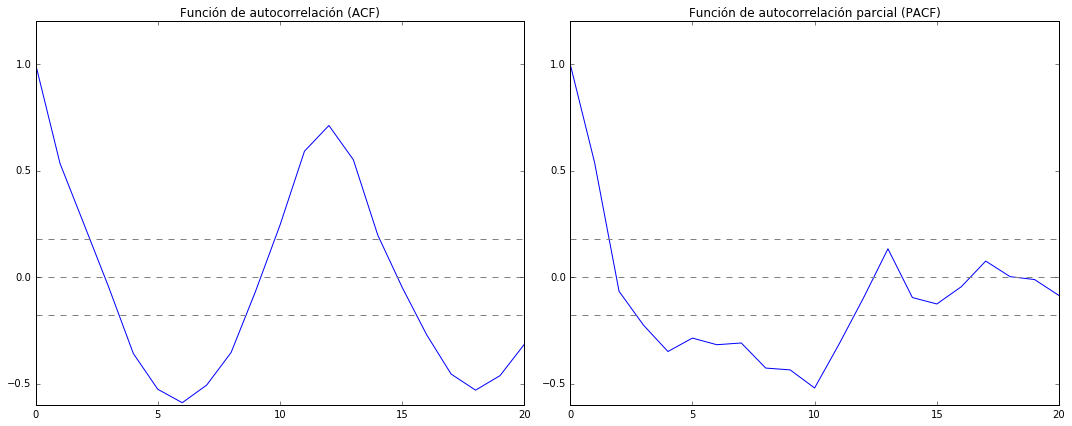

In [22]:
# ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

# Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title(u'Función de autocorrelación (ACF)')

# Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title(u'Función de autocorrelación parcial (PACF)')

plt.tight_layout()


En las gráficas anteriores, las dos líneas punteadas a ambos lados de 0 son las intercalaciones de confianza. Estas pueden usarse para determinar los valores 'p' y 'q' como:

- p: El valor de retardo en el que el gráfico de PACF cruza el intervalo de confianza superior por primera vez. Si observa de cerca, en este caso p es aproximadamente 2.

- q: El valor de retardo en el que el gráfico de ACF cruza el intervalo de confianza superior por primera vez. Si observa de cerca, en este caso q es también 2.

Ahora, vamos a hacer 3 modelos ARIMA diferentes, teniendo en cuenta tanto los efectos individuales como combinados. También imprimiremos el RSS para cada uno. NOTA: el RSS es para los valores de los residuos y no series reales.

In [23]:
# Cargamos el modelo ARIMA
from statsmodels.tsa.arima_model import ARIMA

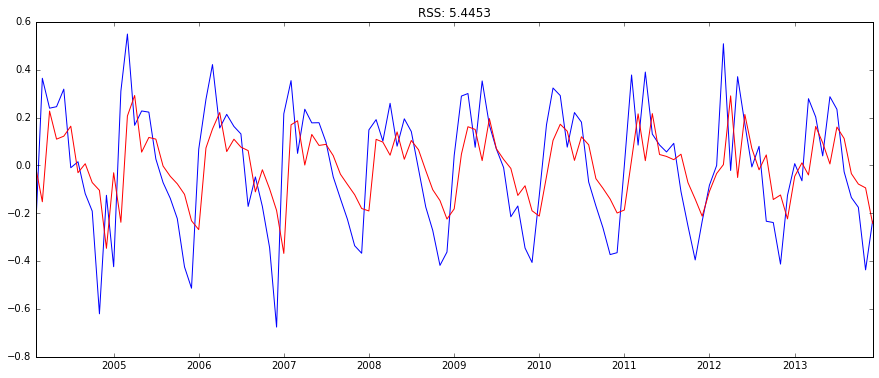

In [24]:
# Modelo AR de ARIMA
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

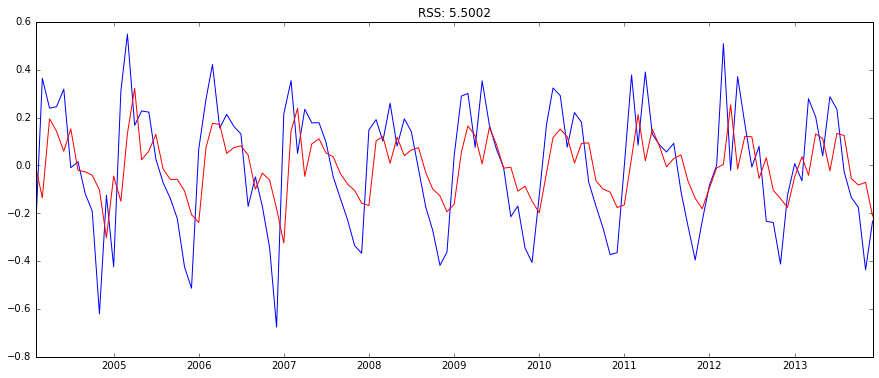

In [25]:
# Modelo MA de ARIMA
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

Antes de aplicar el modelo combinado, obtenemos los valores de p, q y d para los que el modelo sea invertible:

In [26]:
for p in range(3):
    for d in range(3):
        for q in range(3):
            try:
                arima_mod = ARIMA(ts_log,(p,d,q)).fit(transparams=True)
                x = arima_mod.aic
                y = arima_mod.bic
                x1 = p, d, q
                print '- (p, d, q):', x1, x, y
            except:
                pass

- (p, d, q): (0, 0, 0) 135.486101429 141.061084915
- (p, d, q): (0, 0, 1) 27.2151284615 35.5776036898
- (p, d, q): (0, 1, 0) 15.3430384755 20.9012854617
- (p, d, q): (0, 1, 1) -15.1787077686 -6.84133728922
- (p, d, q): (0, 1, 2) -20.3062143697 -9.1897203973
- (p, d, q): (0, 2, 0) 5.98616929165 11.5275385406
- (p, d, q): (0, 2, 1) 4.07748850292 12.3895423763
- (p, d, q): (0, 2, 2) 6.07187644144 17.1546149393
- (p, d, q): (1, 0, 0) 6.94371928657 15.3061945149
- (p, d, q): (1, 0, 1) -30.048974891 -18.8990079199
- (p, d, q): (1, 0, 2) 24.9834719896 38.9209307035
- (p, d, q): (1, 1, 0) -22.9351451121 -14.5977746328
- (p, d, q): (1, 2, 0) 4.16451907747 12.4765729509
- (p, d, q): (2, 0, 0) -69.4119201383 -58.2619531672
- (p, d, q): (2, 1, 0) -21.4893808226 -10.3728868502
- (p, d, q): (2, 2, 0) 6.09124063189 17.1739791298


Tomaremos los valores 2, 2 y 0 de p, d y q

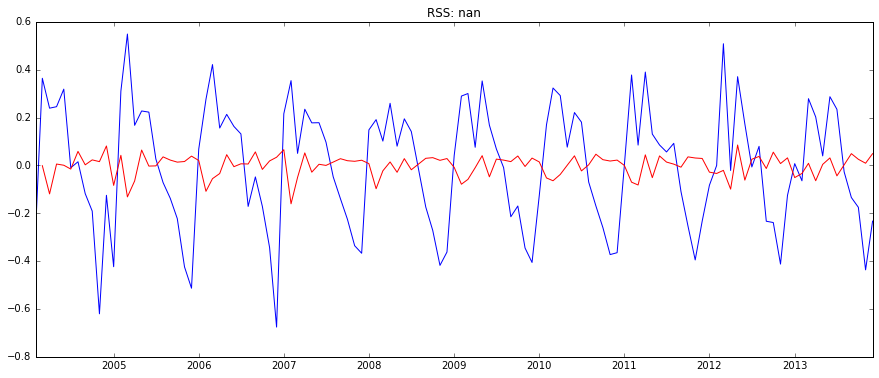

In [27]:
# Modelo combinado de ARIMA
model = ARIMA(ts_log, order=(2, 2, 0))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

Como podemos ver, los modelos AR y MA tienen casi el mismo RSS, pero combinado es significativamente mejor. Ahora, nos queda un último paso, es decir, llevando estos valores a la escala original.

**Regreso a la escala original**

In [28]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

anio_mes
2004-03-01   -0.000815
2004-04-01   -0.118757
2004-05-01    0.006051
2004-06-01    0.001056
2004-07-01   -0.014953
dtype: float64


In [29]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.head()

anio_mes
2004-03-01   -0.000815
2004-04-01   -0.119572
2004-05-01   -0.113521
2004-06-01   -0.112465
2004-07-01   -0.127418
dtype: float64


In [30]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

anio_mes
2004-01-01    2.580217
2004-02-01    2.580217
2004-03-01    2.579402
2004-04-01    2.460645
2004-05-01    2.466696
dtype: float64

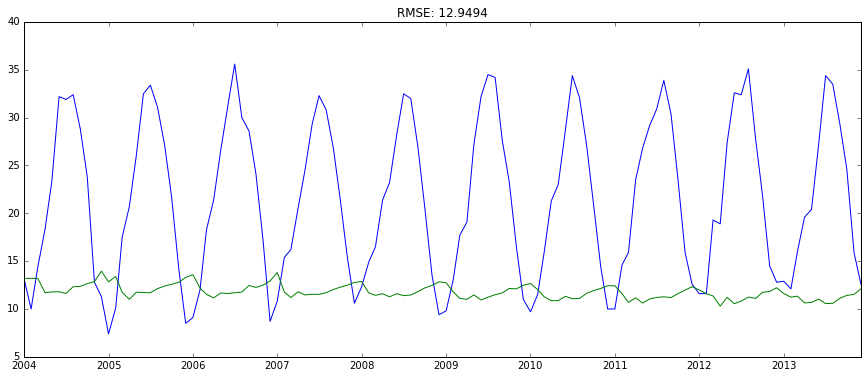

In [31]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(st_muestra)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-st_muestra)**2)/len(st_muestra)))

Finalmente, tenemos un pronóstico en la escala original.